# Predicting Numeric Outcomes with Linear Regression

## -Linear regression in two dimensions

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
#reading in the dataset

df = pd.read_csv("fraud_prediction.csv")

#Defining the feature and target arrays

feature  = df["oldbalanceOrg"].values
target = df["amount"].values

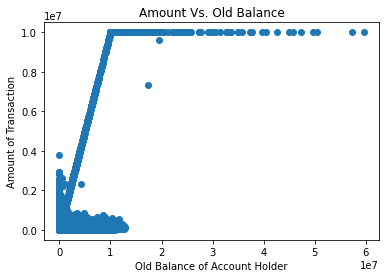

In [5]:
# Creating a scatter plot between the feature and target


plt.scatter(feature,target)
plt.xlabel("Old Balance of Account Holder")
plt.ylabel("Amount of Transaction")
plt.title("Amount Vs. Old Balance")
plt.show()

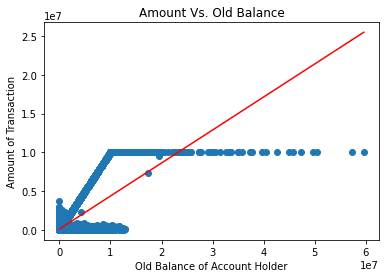

In [8]:
# Importing the library
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

# Initializing a linear regression model

linear_reg = linear_model.LinearRegression()

# Reshaping the array since we only have a single feature

feature = feature.reshape(-1,1)
target = target.reshape(-1,1)


# Fitting the model on the data

linear_reg.fit(feature, target)


# Define the limits of the x axis


x_lim = np.linspace(min(feature),max(feature)).reshape(-1,1)


# Creating the scatter plot

plt.scatter(feature,target)
plt.xlabel("Old Balance of Account Holder")
plt.ylabel("Amount of Transaction")
plt.title("Amount Vs. Old Balance")


# Creating the prediction line

plt.plot(x_lim,linear_reg.predict(x_lim),color="red")

# Show the plot


plt.show()

## - Using linear regression to predict mobile transaction amount 

In [10]:
# Using linear regression tp predict the total amount of a mobile transaction using all the other features in our mobile
# transaction

#Creating the features

features = df.drop('isFraud', axis = 1).values
target = df['isFraud'].values

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.3, random_state = 42, stratify = target)

In [11]:
# Fitting the linear regression model and evaluate the initial accuracy score

linear_reg = linear_model.LinearRegression()

# Fitting the model on the data

linear_reg.fit(X_train,y_train)


#Accuracy of the model

linear_reg.score(X_test,y_test)

0.9857972380288647

## - Scaling the data

In [12]:
# Setting up the pipeline 

pipeline_order = [('scaler', StandardScaler()), ('linear_reg', linear_model.LinearRegression())]

pipeline = Pipeline(pipeline_order)

#Fitting the classfier to the scaled dataset 

linear_reg_scaled = pipeline.fit(X_train, y_train)

#Extracting the score 

linear_reg_scaled.score(X_test, y_test)

0.9857972380288647

## - Using Ridge Regression

In [13]:
#imported earlier 

# Initialize a ridge regression model


ridge_reg = Ridge(alpha = 0, normalize=True)

#Fit the model to the training data

ridge_reg.fit(X_train,y_train)

#Extract the score from the test data

ridge_reg.score(X_test,y_test)

0.9857972380288649

In [14]:
# Obtaining the optimal alpha value with GridSearchCV 

#Building the model

ridge_regression = Ridge()

#Using GridSearchCV to search for the best parameter
grid = GridSearchCV(ridge_regression,{"alpha":[0.0001,0.001,0.01,0.1,10]})
grid.fit(X_train,y_train)

#Print out the best parameter

print("The most optimal value of alpha is:", grid.best_params_)

#Initializing an ridge regression object

ridge_regression = Ridge(alpha=0.01)

#Fitting the model to the training and test sets

ridge_regression.fit(X_train,y_train)


#Accuracy score of the ridge regression model

ridge_regression.score(X_test,y_test)

The most optimal value of alpha is: {'alpha': 0.01}


0.9857972164942486

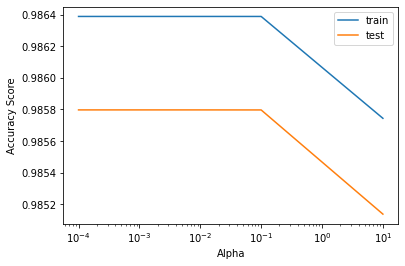

In [15]:
# Verifing the results of the GridSearchCV by plotting the difference between the accuracy scores on the y axis and the different 
# alpha along the x axis for both training and test data

train_errors = []
test_errors = []

alpha_list = [0.0001,0.001,0.01,0.1,10]
#Evaluate the training and test classification errors for each value of alpha 

for value in alpha_list:
    #Create Ridge object and fit
    ridge_regression = Ridge(alpha=value)
    ridge_regression.fit(X_train,y_train)
    
    # Evaluate error rates and append to lists
    train_errors.append(ridge_regression.score(X_train,y_train))
    test_errors.append(ridge_regression.score(X_test,y_test))
    
#Plotting results 


plt.semilogx(alpha_list,train_errors,alpha_list,test_errors)
plt.legend(("train","test"))
plt.ylabel("Accuracy Score")
plt.xlabel("Alpha")
plt.show()

## - Lasso Regression 

In [16]:
import warnings
# Initialize a lasso regression model

lasso_reg = Lasso(alpha=0,normalize=True)

# Fit the model to the trainin data

lasso_reg.fit(X_train,y_train)

warnings.filterwarnings("ignore")

#Extract the score from the test data

lasso_reg.score(X_test,y_test)

<ipython-input-16-1a341ad824b1>:8: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso_reg.fit(X_train,y_train)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 27.790585532447356, tolerance: 0.40832068948137695
  model = cd_fast.enet_coordinate_descent(


0.9857972380254899

In [18]:
#Using GridSearchCV to optimize the value of alpha

#Building the model

lasso_regression = Lasso()


#Using GridSearchCV to search for the best parameter

grid = GridSearchCV(lasso_regression,{"alpha":[0.0001,0.001,0.01,0.1,10]})

grid.fit(X_train,y_train)

# Print out the best parameter 

print("The most optimal value of alpha is: ", grid.best_params_)

#Initializing an lasso regression object

lasso_regression = Lasso(alpha = 0.0001)

#Fitting the model to the training and test sets

lasso_regression.fit(X_train,y_train)

#Accuracy score of the lasso regression model

lasso_regression.score(X_test,y_test)

The most optimal value of alpha is:  {'alpha': 0.0001}


0.9857644406406523

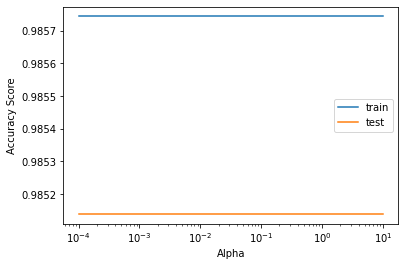

In [20]:
# Using a plot between the accuracy scores and the value of alpha for the training and test sets

train_errors = []
test_errors = []

alpha_list = [0.0001, 0.001, 0.01, 0.1, 10]

# Evaluate the training and test classification errors for each value of alpha

for value in alpha_list:
    
    # Create Lasso object and fit
    lasso_regression = Lasso(alpha= value)
    lasso_regression.fit(X_train, y_train)
    
    # Evaluate error rates and append to lists
    train_errors.append(ridge_regression.score(X_train, y_train) )
    test_errors.append(ridge_regression.score(X_test, y_test))
    
# Plot results
plt.semilogx(alpha_list, train_errors, alpha_list, test_errors)
plt.legend(("train", "test"))
plt.ylabel('Accuracy Score')
plt.xlabel('Alpha')
plt.show()